In [ ]:
!pip3 install cvlib==0.2.5
!pip3 install opencv-python-headless==4.4.0.46
!pip3 install tensorflow==2.3.1

In [ ]:
import zipfile
import os

PATH = 'images-meetings.zip'

base_dir = 'images'

if not os.path.exists(base_dir):
    os.mkdir(base_dir)

with zipfile.ZipFile(PATH, 'r') as my_zip:
	my_zip.extractall(base_dir)

In [ ]:
# Load images and convert it from jpg to ndarray

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

filenames = ['meeting1.jpg', 'meeting2.jpg', 'meeting3.jpg', 'meeting4.jpg', 'meeting5.jpg',
             'meeting6.jpg', 'meeting7.jpg', 'meeting8.jpg', 'meeting9.jpg',]
images_list = []

for filename in filenames:
  img_ndarray = mpimg.imread(f'{base_dir}/{filename}')
  images_list.append(img_ndarray)

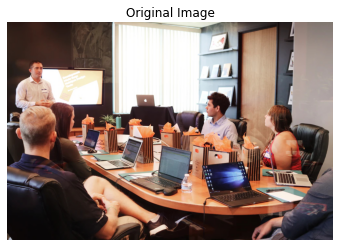

In [ ]:
plt.imshow(images_list[0])
plt.axis("off")
plt.title("Original Image")
plt.show()

In [ ]:
# Putting images in TFRecords

import tensorflow as tf
from tensorflow.train import BytesList
from tensorflow.train import Feature, Features, Example

examples_with_image = []

for img in images_list:
  data = tf.io.encode_jpeg(img)
  example_with_image = Example(features=Features(feature={
      "image": Feature(bytes_list=BytesList(value=[data.numpy()]))}))
  examples_with_image.append(example_with_image)

with tf.io.TFRecordWriter("images.tfrecord") as f:
  for example_with_image in examples_with_image:
    f.write(example_with_image.SerializeToString())

In [ ]:
# Loading images from TFRecords to list of ndarrays

source_images = []

feature_description = { "image": tf.io.VarLenFeature(tf.string) }

for serialized_example_with_image in tf.data.TFRecordDataset(["images.tfrecord"]):
    parsed_example_with_image = tf.io.parse_single_example(serialized_example_with_image,
                                                feature_description)
    decoded_img = tf.io.decode_image(parsed_example_with_image["image"].values[0])
    source_images.append(decoded_img.numpy())

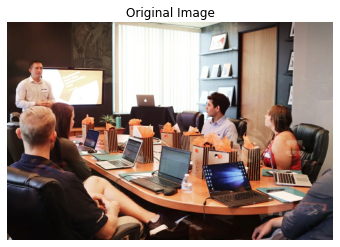

In [ ]:
plt.imshow(source_images[0])
plt.axis("off")
plt.title("Original Image")
plt.show()

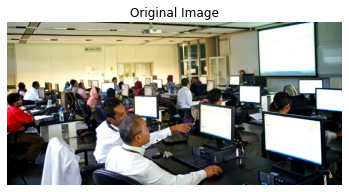

In [ ]:
plt.imshow(source_images[1])
plt.axis("off")
plt.title("Original Image")
plt.show()

In [ ]:
output_dir = "images_with_bounding_boxes"
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

In [ ]:
# Object Detection using cvlib (yolo)

import cv2
import cvlib as cv
from cvlib.object_detection import draw_bbox
from IPython.display import Image, display

def detect_and_draw_box(image_ndarray, output_dir, filename, model="yolov3-tiny", confidence=0.5):
    """Detects common objects on an image and creates a new image with bounding boxes.

    Args:
        image_ndarray (ndarray): source image.
        output_dir (str): Directory of output images.
        filename (str): Filename of the image.
        model (str): Either "yolov3" or "yolov3-tiny". Defaults to "yolov3-tiny".
        confidence (float, optional): Desired confidence level. Defaults to 0.5.
    """    
   
    # Perform the object detection
    bbox, label, conf = cv.detect_common_objects(image_ndarray, confidence=confidence, model=model)
    
    # Print current image's filename
    print(f"========================\nImage processed: {filename}\n")
    
    # Print detected objects with confidence level
    for l, c in zip(label, conf):
        print(f"Detected object: {l} with confidence level of {c}\n")
    
    # Create a new image that includes the bounding boxes
    output_image = draw_bbox(image_ndarray, bbox, label, conf)
    
    # Save the image in the output directory
    cv2.imwrite(f'{output_dir}/{filename}', output_image)
    
    # Display the image with bounding boxes
    display(Image(f'{output_dir}/{filename}'))

Image processed: meeting1.jpg

Detected object: laptop with confidence level of 0.9982895255088806

Detected object: laptop with confidence level of 0.9960739016532898

Detected object: person with confidence level of 0.9890591502189636

Detected object: person with confidence level of 0.9637731909751892

Detected object: laptop with confidence level of 0.9573227763175964

Detected object: laptop with confidence level of 0.9517460465431213

Detected object: person with confidence level of 0.9412861466407776

Detected object: tv with confidence level of 0.8974066376686096

Detected object: laptop with confidence level of 0.8400713205337524

Detected object: person with confidence level of 0.8071901798248291

Detected object: bottle with confidence level of 0.7867247462272644

Detected object: person with confidence level of 0.7422575950622559

Detected object: chair with confidence level of 0.4723496437072754

Detected object: bottle with confidence level of 0.4422685503959656

Detected

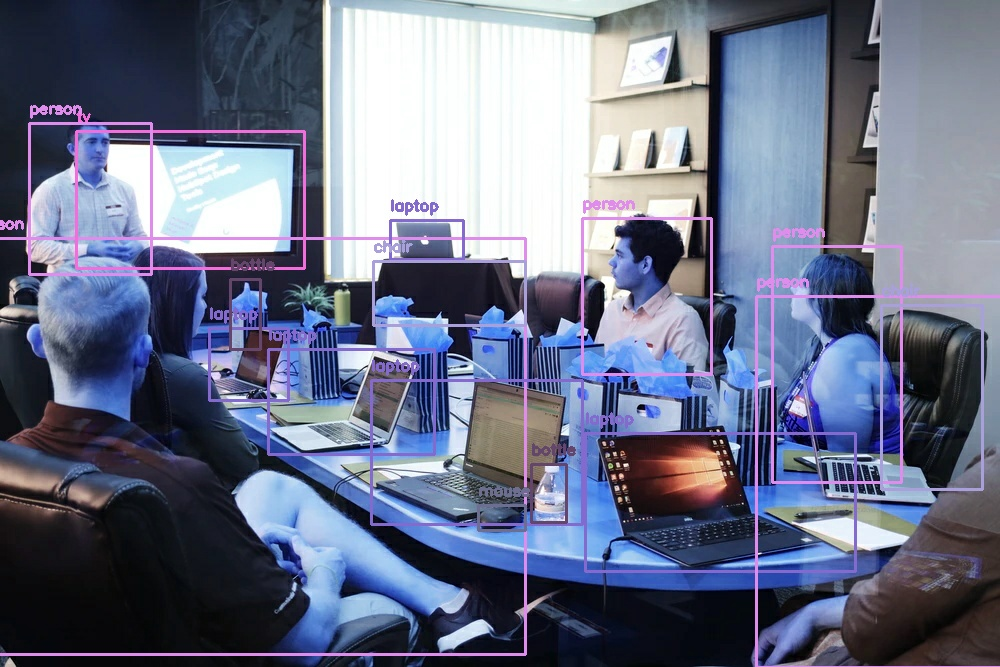

Image processed: meeting2.jpg

Detected object: tv with confidence level of 0.9642283916473389

Detected object: keyboard with confidence level of 0.9593889117240906

Detected object: person with confidence level of 0.9314205646514893

Detected object: keyboard with confidence level of 0.9149114489555359

Detected object: mouse with confidence level of 0.8886950612068176

Detected object: person with confidence level of 0.8700445294380188

Detected object: chair with confidence level of 0.8612954020500183

Detected object: tv with confidence level of 0.8132365942001343

Detected object: person with confidence level of 0.7495658993721008

Detected object: person with confidence level of 0.6875911355018616

Detected object: tv with confidence level of 0.6546795964241028

Detected object: person with confidence level of 0.558366596698761

Detected object: mouse with confidence level of 0.5413597822189331

Detected object: tv with confidence level of 0.5027356743812561

Detected object: tv

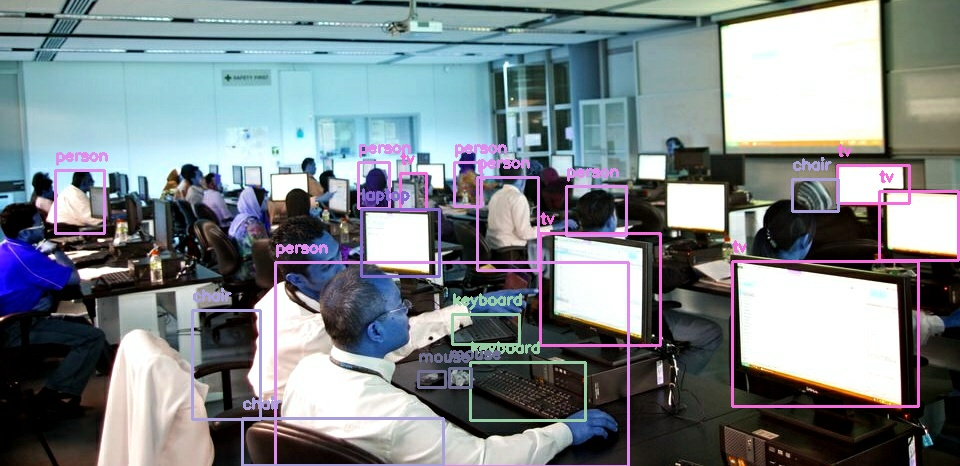

Image processed: meeting3.jpg

Detected object: person with confidence level of 0.9927002191543579

Detected object: chair with confidence level of 0.9890400171279907

Detected object: chair with confidence level of 0.9872735738754272

Detected object: tv with confidence level of 0.929768443107605

Detected object: keyboard with confidence level of 0.85793536901474

Detected object: tv with confidence level of 0.6283076405525208

Detected object: tv with confidence level of 0.5326560735702515

Detected object: person with confidence level of 0.5014780163764954

Detected object: person with confidence level of 0.4648353159427643

Detected object: tv with confidence level of 0.4234744608402252

Detected object: tv with confidence level of 0.41996118426322937



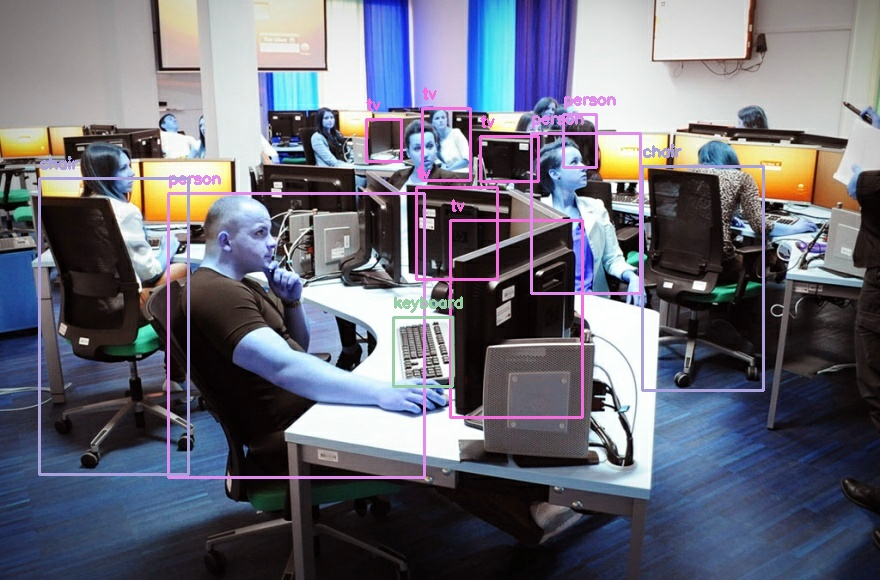

In [ ]:
for image_ndarray, filename in zip(source_images[:3], filenames[:3]):
    detect_and_draw_box(image_ndarray, output_dir, filename, model="yolov3", confidence=0.4)